Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_dataset = pd.read_csv('finaldataset.csv')
final_dataset.head(5)

,Unnamed: 0,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Autumn,Spring,Summer,Winter,coastal,inland,mountain,Cloudy,Rainy,Snowy,Sunny
0,0,14.0,73.0,9.5,82.0,1,1010.82,2,3.5,0,0,0,1,0,1,0,0,1,0,0
1,1,39.0,96.0,8.5,71.0,1,1011.43,7,10.0,0,1,0,0,0,1,0,1,0,0,0
2,2,30.0,64.0,7.0,16.0,0,1018.72,5,5.5,0,1,0,0,0,0,1,0,0,0,1
3,3,38.0,83.0,1.5,82.0,0,1026.25,7,1.0,0,1,0,0,1,0,0,0,0,0,1
4,4,27.0,74.0,17.0,66.0,3,990.67,1,2.5,0,0,0,1,0,0,1,0,1,0,0


In [14]:
data = final_dataset[['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Visibility (km)','Autumn','Spring','Summer','Winter','coastal','inland','mountain']]
target = final_dataset[['Cloudy','Rainy','Snowy','Sunny']] 


Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state=0, stratify = target)

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (9197, 15)
y_train shape: (9197, 4)


In [19]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (3942, 15)
y_test shape: (3942, 4)


Text(0, 0.5, 'no of weathers')

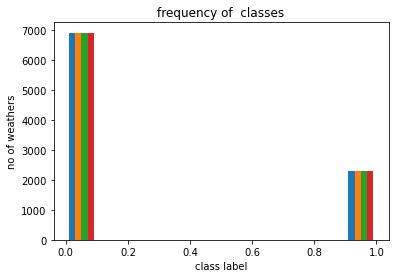

In [20]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of weathers')

Feature Scaling using minmax scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

Training KNN model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#Without scaling
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.87


In [28]:
knn=KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Test set accuracy: 0.87
